In [2]:
print("Hello,world!")

Hello,world!


In [9]:
import requests
import json
import os
import base64
from Crypto.Cipher import AES
from pprint import pprint
def aesEncrypt(text, secKey):
    pad = 16 - len(text) % 16
    text = text + pad * chr(pad)
    encryptor = AES.new(secKey, 2, '0102030405060708')
    ciphertext = encryptor.encrypt(text)
    ciphertext = base64.b64encode(ciphertext)
    return ciphertext


def rsaEncrypt(text, pubKey, modulus):
    text = text[::-1]
    rs = int(text.encode('hex'), 16)**int(pubKey, 16) % int(modulus, 16)
    return format(rs, 'x').zfill(256)


def createSecretKey(size):
    return (''.join(map(lambda xx: (hex(ord(xx))[2:]), os.urandom(size))))[0:16]


url = 'http://music.163.com/weapi/v1/resource/comments/R_SO_4_30953009/?csrf_token='
headers = {
    'Cookie': 'appver=1.5.0.75771;',
    'Referer': 'http://music.163.com/'
}
text = {
    'username': 'ÈÇÆÁÆ±',
    'password': 'ÂØÜÁ†Å',
    'rememberLogin': 'true'
}
modulus = '00e0b509f6259df8642dbc35662901477df22677ec152b5ff68ace615bb7b725152b3ab17a876aea8a5aa76d2e417629ec4ee341f56135fccf695280104e0312ecbda92557c93870114af6c9d05c4f7f0c3685b7a46bee255932575cce10b424d813cfe4875d3e82047b97ddef52741d546b8e289dc6935b3ece0462db0a22b8e7'
nonce = '0CoJUm6Qyw8W8jud'
pubKey = '010001'
text = json.dumps(text)
secKey = createSecretKey(16)
encText = aesEncrypt(aesEncrypt(text, nonce), secKey)
encSecKey = rsaEncrypt(secKey, pubKey, modulus)
data = {
    'params': encText,
    'encSecKey': encSecKey
}

req = requests.post(url, headers=headers, data=data)
pprint(req.json())
for content in req.json()['comments']:
    print (content['content'].encode('utf-8'))
print (req.json()['total'])


TypeError: ord() expected string of length 1, but int found

In [8]:
a=100
print(a)

100


In [7]:
print "hello,world"

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("hello,world")? (<ipython-input-7-4fea1ae9cd97>, line 1)

In [ ]:
#coding = utf-8
from Crypto.Cipher import AES
import base64
import requests
import json


old_offset="0";
first_param = "{rid:\"\", offset:\"0\", total:\"true\", limit:\"10\", csrf_token:\"\"}"
second_param = "010001"
third_param = "00e0b509f6259df8642dbc35662901477df22677ec152b5ff68ace615bb7b725152b3ab17a876aea8a5aa76d2e417629ec4ee341f56135fccf695280104e0312ecbda92557c93870114af6c9d05c4f7f0c3685b7a46bee255932575cce10b424d813cfe4875d3e82047b97ddef52741d546b8e289dc6935b3ece0462db0a22b8e7"

forth_param = "0CoJUm6Qyw8W8jud"

def get_params():
    iv = "0102030405060708"
    first_key = forth_param
    second_key = 16 * 'F'
    h_encText = AES_encrypt(first_param, first_key, iv)
    h_encText = AES_encrypt(h_encText, second_key, iv)
    return h_encText


def get_encSecKey():
    encSecKey = "257348aecb5e556c066de214e531faadd1c55d814f9be95fd06d6bff9f4c7a41f831f6394d5a3fd2e3881736d94a02ca919d952872e7d0a50ebfa1769a7a62d512f5f1ca21aec60bc3819a9c3ffca5eca9a0dba6d6f7249b06f5965ecfff3695b54e1c28f3f624750ed39e7de08fc8493242e26dbc4484a01c76f739e135637c"
    return encSecKey

def AES_encrypt(text, key, iv):
    pad = 16 - len(text) % 16
    text = text + pad * chr(pad)
    encryptor = AES.new(key, AES.MODE_CBC, iv)
    encrypt_text = encryptor.encrypt(text)
    encrypt_text = base64.b64encode(encrypt_text)
    encrypt_text = str(encrypt_text, encoding="utf-8")
    return encrypt_text


def get_json(url, params, encSecKey):
    data = {
         "params": params,
         "encSecKey": encSecKey
    }
    headers={
        'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36',
        'Cookie': 'appver=1.5.0.75771;',
        'Referer': 'http://music.163.com/'
    }
    response = requests.post(url, headers=headers, data=data)
    return response.content

if __name__ == "__main__":
    song_id=input("ËæìÂÖ•Ê≠åÊõ≤IDÔºö")
    url = 'http://music.163.com/weapi/v1/resource/comments/R_SO_4_30635613/?csrf_token='
    for i in range (1,10):
        print("In ",i," round")
        params = get_params()
        encSecKey = get_encSecKey()
        json_text = get_json(url, params, encSecKey)
        json_dict = json.loads(json_text)
        #print (json.dumps(json_dict,sort_keys=True,indent=4,separators=(',',':'),ensure_ascii=False))
        for item in json_dict['comments']:
            #print(item['user']['nickname'])
            print(item['user']['nickname'],':',item['content'])
        print(old_offset)
        first_param.replace(old_offset,str((i+1)*10));
        old_offset=str((i+1)*10)

In [26]:
30635613


30635613

http://music.163.com/weapi/v1/resource/comments/R_VI_62_C3C7FC6B55DE1F87051C88668F7196DD/?csrf_token=
https://music.163.com/weapi/comment/commentthread/info?csrf_token=
O5/yxckUkfK03FP34r7bgEUt9Rsc/jnUB14GDqW0sT8ntUZaFY3qzIhvs38kxiuQ8Vqp+4wfOilfoAiaAM62qNG4aEcWPT30EUsqLhsM4Rez8AM2qQWFai28nsyyKmGP
{'msg': 'ÂèÇÊï∞ÈîôËØØ', 'code': 400}
In  1  round
O5/yxckUkfK03FP34r7bgEUt9Rsc/jnUB14GDqW0sT8ntUZaFY3qzIhvs38kxiuQ8Vqp+4wfOilfoAiaAM62qNG4aEcWPT30EUsqLhsM4Rez8AM2qQWFai28nsyyKmGP
Â∞∏Â∞∏Â∞∏xxx : Ë∫´ÊùêÔºÅÔºÅÔºÅÂ´âÂ¶í‰ΩøÊàë‰∏ëÈôã
ÂØíÂïÜÂçø : ÂßëÂ®òÁúüÁöÑÁò¶Âà∞ËÆ©Êàë‰∏çÊÉ≥ËØ¥ËØù„ÄÇ„ÄÇ„ÄÇ[ÊµÅÊ≥™]Áæ°ÊÖïing
caomaohou : ÊàëÂõΩÊúâ‰∏ÄÂ•óÂÆåÊï¥ÁöÑÂàëÊ≥ï
‰πùÂ§èËèáÂáâ : Áé∞Âú®Âà∑ÁΩëÊòìËßÜÈ¢ëÊúâÁßçÈÄõbÁ´ôÁöÑÊÑüËßâ ÂìàÂìàÂìàÂìàÂìàÂìà
‰πùÂ§èËèáÂáâ : Â∞èÂßêÂßêÂèØÁà±ÔºÅ
COYULILI : ÊúÄÂêéÔºåÂêéÈù¢Êúâ‰∏™Â§ßÂ¶àÊëáÊëáÊôÉÊôÉÁöÑËµ∞ÁùÄ
Ëø™ÂáèÂ••ÁâπÊõºÊõº : ÁªÜÊÄùÁîöÊÅê
ÂåóÂ±±‰∫¶Èò≥ : ËøôËÉåÊôØÁõ∏ÂΩì‰∏çÈîô·Éö(‚ïπ‚ó°‚ïπ·Éö)
Áé∫Ê¨¢ÊòìËæàÂ≠ê : Êàë‰ª¨Â≠¶Ê†°Â∞±ÊúâÂ≠¶Â¶π‰ª¨Âú®Ë∑≥üôÉ
abdihnimkh : ÿ¶ÿßŸÜÿßŸÖ
{rid:"", offset:

ÁÇíÈ∏°ÁÇíÈ∏°ÈÖ∑ÁöÑÂ∞èÊúãÂèã : ËøôÂá†Â§©‰Ω†ÊÄªÊòØÂõ¥ÁùÄÊàëÂò§Âò§Âò§
ÊàëÂ•ΩÂ•áÁöÑÈóÆ‰Ω†Âú®Âπ≤‰ªÄ‰πà
‰ªñËØ¥‚ÄúÊàëÂú®Ë∞ÉÊàèÂ§ßÂ¶à‚Äù
ÁúüÂ•ΩÂëÄ ÊàëÊòØ‰Ω†ÁöÑ‰ªôÂ•≥
‰Ω†ÁöÑÈ•≤‰∏ªÂè™ÊúâÊàëÔºàÈÄÉÔºâ(‚åí‚ñΩ‚åí)
Ë•øÊ≥†ÂÑøer_ : Â∞èÂßêÂßêÊàëÁà±‰∏ä‰Ω†‰∫Ü
Ëä±ÂâçÊúà‰∏ãÁöÑËàûÊ≠• : Â§ßÂ¶àÂÆûÂäõÊä¢Èïú
Á´πÊµ™È£ûÊ°¶hl : ÊàëÊúâ‰∏Ä‰∏™Â§ßËÉÜÁöÑÊÉ≥Ê≥ïÔºåÂ∞èÂßêÂßêÁº∫Áî∑ÊúãÂèãÂêßÔºåÂèØ‰ª•ÊâæÊàë
Áî≥Â∞èËê±ÁöÑÂè§ÊúàÁê¥‰∫ã : Â•ΩÂê¨ÁöÑÊ≠åÔΩû‰πüÊ¨¢ËøéÊù•Êàë‰∏ªÈ°µÂê¨‰∫åËÉ°Áâà„ÄäÂØÑÊòéÊúà„Äã[Â•∏Á¨ë]
ChikaÁü•Â§è : ‰º¢‰º¢Êï≤Â•ΩÁúãÔºÅÔºÅÔºÅ\(//‚àá//)\
Fragmented-dream : ÊúâËÖøÁúüÂ•Ω[Áö±Áúâ]
ÂàùÊô¥ZJL : Â•πÊÄé‰πàÂèØ‰ª•Ëøô‰πàÂèØÁà±ÔºÅÂ•πÁöÑËÖøÊÄé‰πàÂèØ‰ª•Ëøô‰πàÂ•ΩÁúãÔºÅÊÄé‰πàÂèØ‰ª•ÔºÅ‰πàÂèØ‰ª•ÔºÅÂèØ‰ª•ÔºÅ‰ª•ÔºÅ
Frymor : ÂéâÂÆ≥ÔºåË∑≥ÁöÑÂ•ΩÁúã
HIMEIMAN : ËßâÂæóÂ∞èÂßêÂßê‰∏çÈÄÇÂêàËøô‰∏™ÂèëÂûãÔºå‰ΩÜÊòØËàûËøòÊòØÁæéÂïäÔºÅ
{rid:"", offset:"180", total:"false", limit:"10", csrf_token:""}
180


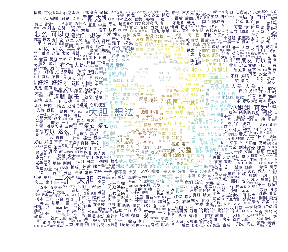

In [11]:
#coding = utf-8
from Crypto.Cipher import AES
import base64
import requests
import json
from wordcloud import WordCloud,ImageColorGenerator 
import jieba        #ÂàÜËØçÂ∫ì
import imageio
import numpy as np    #ÁßëÂ≠¶Êï∞Â≠¶ËÆ°ÁÆóÂåÖ
import matplotlib.pyplot as plt   #Êï∞Â≠¶ÁªòÂõæÂ∫ì
from PIL import Image






old_offset="0"
first_param = "{rid:\"\", offset:\"0\", total:\"false\", limit:\"10\", csrf_token:\"\"}"
second_param = "010001"
third_param = "00e0b509f6259df8642dbc35662901477df22677ec152b5ff68ace615bb7b725152b3ab17a876aea8a5aa76d2e417629ec4ee341f56135fccf695280104e0312ecbda92557c93870114af6c9d05c4f7f0c3685b7a46bee255932575cce10b424d813cfe4875d3e82047b97ddef52741d546b8e289dc6935b3ece0462db0a22b8e7"
forth_param = "0CoJUm6Qyw8W8jud"

user_info="http://music.163.com/#/user/home?id="

filename='/Users/limuyle/Desktop/comment_video.txt'

# def convert(content):
#     typeEncode=sys.getfilesystemencoding()
#     infoEncode=chardet.detect(content).get('encoding','utf-8')
#     return content.decode(infoEncode,'ignore').encode('utf-8')

def get_params():
    iv = "0102030405060708"
    first_key = forth_param
    second_key = 16 * 'F'
    h_encText = AES_encrypt(first_param, first_key, iv)
    h_encText = AES_encrypt(h_encText, second_key, iv)
    return h_encText


def get_encSecKey():
    encSecKey = "257348aecb5e556c066de214e531faadd1c55d814f9be95fd06d6bff9f4c7a41f831f6394d5a3fd2e3881736d94a02ca919d952872e7d0a50ebfa1769a7a62d512f5f1ca21aec60bc3819a9c3ffca5eca9a0dba6d6f7249b06f5965ecfff3695b54e1c28f3f624750ed39e7de08fc8493242e26dbc4484a01c76f739e135637c"
    return encSecKey

def AES_encrypt(text, key, iv):
    pad = 16 - len(text) % 16
    text = text + pad * chr(pad)
    encryptor = AES.new(key, AES.MODE_CBC, iv)
    encrypt_text = encryptor.encrypt(text)
    encrypt_text = base64.b64encode(encrypt_text)
    encrypt_text = str(encrypt_text, encoding="utf-8")
    return encrypt_text


def get_json(url, params, encSecKey):
    data = {
         "params": params,
         "encSecKey": encSecKey
    }
    headers={
        'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36',
        'Cookie': 'appver=1.5.0.75771;',
        'Referer': 'http://music.163.com/'
    }
    response = requests.post(url, headers=headers, data=data)
    return response.content


# def get_html(url):
#     headers={
#         'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36',
#         'Cookie': 'appver=1.5.0.75771;',
#         'Referer': 'http://music.163.com/'
#     }
#     response=requests.post(url,headers=headers)
#     if response.status_code==200:
#         return response.text
#     return None

def get_dict(json_str):
    json_dict=json.loads(json_str)
    return json.dumps(json_dict,sort_keys=True,indent=4,separators=(',',':'),ensure_ascii=False)

def get_rounds(times,url):
    global first_param,old_offset
  
    for i in range (1,times):
        print("In ",i," round")
        params = get_params()
        print(params)
        encSecKey = get_encSecKey()
        json_text = get_json(url, params, encSecKey)
        json_dict = json.loads(json_text)
            #         print (json.dumps(json_dict,sort_keys=True,indent=4,separators=(',',':'),ensure_ascii=False))
        for item in json_dict['comments']:
            print(item['user']['nickname'],':',item['content'])
            with open(filename,'a',encoding='utf-8') as file:
            #                 file.write(' '.join([item['user']['nickname'],':',item['content']]))
                file.write(item['content'])
            #                 file.write('\n'+'='*50+'\n')
        print(first_param)
        print(old_offset)
        first_param=first_param.replace(old_offset,str(i*10),1)
      
        old_offset=str(i*10)

def get_playInfo(url_playInfo):
    params = get_params()
    print(url_playInfo)
    print(params)
    encSecKey = get_encSecKey()
    json_text = get_json(url_playInfo, params,encSecKey)
    json_dict = json.loads(json_text)
    print(json_dict)
#     return json_dict['commentCount']
    


def get_wordcloud(filename):
    with open(filename) as f:
        mytxt=f.read()
        cut_txt=jieba.cut(mytxt,cut_all=False)
        result="/".join(cut_txt)
        image=Image.open(r'/Users/limuyle/Desktop/timg.jpg')
        graph=np.array(image)

        cloud=WordCloud(font_path='/Users/limuyle/Downloads/simhei.ttf',background_color='white',mask=graph,max_font_size=40,max_words=2000)
        wordcloud=cloud.generate(result)
        image_color=ImageColorGenerator(graph)
        wordcloud.recolor(color_func=image_color)

        wordcloud.to_file('/Users/limuyle/Desktop/wordcloud_video.jpg')
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()


        
        

if __name__ == "__main__":
    video_id="C3C7FC6B55DE1F87051C88668F7196DD"
    
    url = 'http://music.163.com/weapi/v1/resource/comments/R_VI_62_'+video_id+'/?csrf_token='
    print(url)
    url_playInfo = 'https://music.163.com/weapi/comment/commentthread/info?csrf_token='
    get_playInfo(url_playInfo)
    #print(page)
    
    get_rounds(20,url)   
    get_wordcloud(filename)
    
        

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8">
<meta name="baidu-site-verification" content="cNhJHKEzsD" />
<meta property="qc:admins" content="27354635321361636375" />
<link rel="canonical" href="https://music.163.com/">
<meta name="applicable-device" content="pc,mobile">
<title>ÁΩëÊòì‰∫ëÈü≥‰πê</title>
<meta name="keywords" content="ÁΩëÊòì‰∫ëÈü≥‰πêÔºåÈü≥‰πêÔºåÊí≠ÊîæÂô®ÔºåÁΩëÊòìÔºå‰∏ãËΩΩÔºåÊí≠ÊîæÔºåDJÔºåÂÖçË¥πÔºåÊòéÊòüÔºåÁ≤æÈÄâÔºåÊ≠åÂçïÔºåËØÜÂà´Èü≥‰πêÔºåÊî∂ËóèÔºåÂàÜ‰∫´Èü≥‰πêÔºåÈü≥‰πê‰∫íÂä®ÔºåÈ´òÈü≥Ë¥®Ôºå320KÔºåÈü≥‰πêÁ§æ‰∫§ÔºåÂÆòÁΩëÔºåmusic.163.com" />
<meta name="description" content="ÁΩëÊòì‰∫ëÈü≥‰πêÊòØ‰∏ÄÊ¨æ‰∏ìÊ≥®‰∫éÂèëÁé∞‰∏éÂàÜ‰∫´ÁöÑÈü≥‰πê‰∫ßÂìÅÔºå‰æùÊâò‰∏ì‰∏öÈü≥‰πê‰∫∫„ÄÅDJ„ÄÅÂ•ΩÂèãÊé®ËçêÂèäÁ§æ‰∫§ÂäüËÉΩÔºå‰∏∫Áî®Êà∑ÊâìÈÄ†ÂÖ®Êñ∞ÁöÑÈü≥‰πêÁîüÊ¥ª„ÄÇ" />
<meta property="og:title" content="ÁΩëÊòì‰∫ëÈü≥‰πê" />
<meta property="og:type" content="website" />
<meta property="og:image" content="http://p3.music.126.net/tBTNafgjNnTL1KlZMt7lVA==/18885211718935735.jpg" />
<meta property="og:url

Â∏¶ÂÖ•Ê≥ï : Ëøô‰∏™‰∏ñÁïå‰∏äÔºå‰ªéÊù•Â∞±Ê≤°ÊúâÊúÄÂ•ΩÁöÑÔºåÂè™ÊúâÊúÄÂêàÈÄÇÁöÑ„ÄÇÊØîÂ¶ÇËìùÂ§©ÂíåÁôΩ‰∫ëÔºåÁªøËçâÂíåÂ§ßÂú∞ÔºåÊØîÂ¶ÇÊàëÈÅáÂà∞‰Ω†Ôºå‰ª•ÂèäÔºå‰Ω†ÈÅáÂà∞Êàë„ÄÇ
‚Äî‚ÄîÂ§èËë≥„Ää‰∏ÄËìëÁÉüÈõ®‰ªªÂπ≥Áîü„Äã
‰∏ä‰ªôuuu : ÂùêÂú®ËΩ¶‰∏äÔºåËΩ¶ÈÄüÂºÄÂà∞‰∫îÂçÅËøàÔºåÂêπÁùÄÂëºÂíåÊµ©ÁâπÂæÆÁÉ≠ÁöÑÈ£éÔºåÁúãÁùÄÂ§öÂπ¥ÁöÑÂèòÂåñÔºåËÄ≥Êú∫ÂøΩÁÑ∂‰º†Êù•ËøôÈ¶ñÊ≠åÔºåËÆ©ÊàëÊÉ≥Ëµ∑‰ªñÔºå‰ªñËøòÂ•ΩÂêó
Ëä±ÁîüÈÖ±‰∏éÊäπËå∂ËõãÁ≥ï : ÊàëÊÉ≥Êúâ‰∏ÄÂ§©ËÉΩÂºπÂêâ‰ªñÁªô‰ªñÂê¨
Â±Ö‰∏ÄÈÖ• : ÊàëÊÉ≥ÂõûÂÆ∂„ÄÇ‰∏çÊÉ≥‰∏äÂ≠¶„ÄÇ
Âòø‰∏∂ys : È´ò‰∏≠ÈÇ£‰ºöÔºåÊàëÊöóÊÅãÁùÄ‰∏Ä‰∏™Â•≥Â≠©Â≠êÔºåÈÇ£Â§©Â•πÂú®ÊäòÁ∫∏Èπ§ÔºåÊàëËØ¥‚ÄúËøôÊòØË¶ÅÈÄÅÁªôË∞ÅÂïä‚ÄùÔºåÂ•πÁúãÁùÄÊàëËØ¥‚ÄúÈÄÅÁªôÊàëÊúÄÂñúÊ¨¢ÁöÑ‰∫∫‚Äù„ÄÇÈÇ£Âπ¥ÊØï‰∏öÔºåÂ•πÈÄÅÁªôÊàë‰∏ÄÂè™ÁÜäÂÖ¨‰ªî„ÄÇÂêéÊù•ÊàëÁªìÂ©ö‰∫ÜÊúâ‰∫ÜÂ≠©Â≠êÔºåÊúâ‰∏ÄÂ§©Â≠©Â≠êË∞ÉÁöÆÁî®ÂàÄÂâ≤ÂºÄ‰∫ÜÈÇ£ÁÜäÔºåÈáåÈù¢Ë£ÖÁùÄËÆ∏ËÆ∏Â§öÂ§öÁöÑÁ∫∏Èπ§ÔºåÂΩìÊó∂ÊàëÂì≠‰∫ÜÔºåÂ¶ÇÊûú‰∏äÂ§©ÂÜçÁªôÊàë‰∏ÄÊ¨°ÈáçÊù•ÁöÑÊú∫‰ºö
ÂÖ∂ÂÆû‰∏äÈù¢ÈÉΩÊòØÊàëÁºñÁöÑ„ÄÇÊàëÊòØÂçïË∫´Áãó
Ê©ãËÄÅË•øbleuchilin : Êú¨‰ª•‰∏∫‰ºöÊ≤âÊµ∏Âú®ÊÇ≤‰º§‰∏≠ ‰ΩÜÊÄéÂ•àÊóãÂæãÂÆõËΩ¨ÂèçÂ§ç ‰ºº‰πéÂ

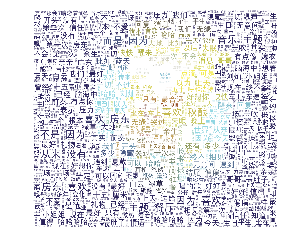

In [18]:
#coding = utf-8
from Crypto.Cipher import AES
import base64
import requests
import json
from wordcloud import WordCloud,ImageColorGenerator 
import jieba        #ÂàÜËØçÂ∫ì
import imageio
import numpy as np    #ÁßëÂ≠¶Êï∞Â≠¶ËÆ°ÁÆóÂåÖ
import matplotlib.pyplot as plt   #Êï∞Â≠¶ÁªòÂõæÂ∫ì
from PIL import Image
import re


old_offset="0"
first_param = "{rid:\"\", offset:\"0\", total:\"false\", limit:\"10\", csrf_token:\"\"}"
second_param = "010001"
third_param = "00e0b509f6259df8642dbc35662901477df22677ec152b5ff68ace615bb7b725152b3ab17a876aea8a5aa76d2e417629ec4ee341f56135fccf695280104e0312ecbda92557c93870114af6c9d05c4f7f0c3685b7a46bee255932575cce10b424d813cfe4875d3e82047b97ddef52741d546b8e289dc6935b3ece0462db0a22b8e7"
forth_param = "0CoJUm6Qyw8W8jud"
filename='/Users/limuyle/Desktop/comments.txt'


def get_params():
    iv = "0102030405060708"
    first_key = forth_param
    second_key = 16 * 'F'
    h_encText = AES_encrypt(first_param, first_key, iv)
    h_encText = AES_encrypt(h_encText, second_key, iv)
    return h_encText


def get_encSecKey():
    encSecKey = "257348aecb5e556c066de214e531faadd1c55d814f9be95fd06d6bff9f4c7a41f831f6394d5a3fd2e3881736d94a02ca919d952872e7d0a50ebfa1769a7a62d512f5f1ca21aec60bc3819a9c3ffca5eca9a0dba6d6f7249b06f5965ecfff3695b54e1c28f3f624750ed39e7de08fc8493242e26dbc4484a01c76f739e135637c"
    return encSecKey

def AES_encrypt(text, key, iv):
    pad = 16 - len(text) % 16
    text = text + pad * chr(pad)
    encryptor = AES.new(key, AES.MODE_CBC, iv)
    encrypt_text = encryptor.encrypt(text)
    encrypt_text = base64.b64encode(encrypt_text)
    encrypt_text = str(encrypt_text, encoding="utf-8")
    return encrypt_text


def get_json(url, params, encSecKey):
    data = {
         "params": params,
         "encSecKey": encSecKey
    }
    headers={
        'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36',
        'Cookie': 'appver=1.5.0.75771;',
        'Referer': 'http://music.163.com/'
    }
    response = requests.post(url, headers=headers, data=data)
    return response.content

def get_rounds(times):
    global first_param,old_offset
    print(url)
  
    for i in range (1,times):
        print("In ",i," round")
        params = get_params()
        encSecKey = get_encSecKey()
        json_text = get_json(url, params, encSecKey)
        json_dict = json.loads(json_text)
            #         print (json.dumps(json_dict,sort_keys=True,indent=4,separators=(',',':'),ensure_ascii=False))
        for item in json_dict['comments']:
            print(item['user']['nickname'],':',item['content'])
            with open(filename,'a',encoding='utf-8') as file:
            #                 file.write(' '.join([item['user']['nickname'],':',item['content']]))
                file.write(item['content'])
            #                 file.write('\n'+'='*50+'\n')
        print(first_param)
        print(old_offset)
        first_param=first_param.replace(old_offset,str(i*10),1)
      
        old_offset=str(i*10)
                    
                    
    

def get_wordcloud(filename):
    with open(filename) as f:
        mytxt=f.read()
        cut_txt=jieba.cut(mytxt,cut_all=False)
        result="/".join(cut_txt)
        image=Image.open(r'/Users/limuyle/Desktop/timg.jpg')
        graph=np.array(image)

        cloud=WordCloud(font_path='/Users/limuyle/Downloads/simhei.ttf',background_color='white',mask=graph,max_font_size=40,max_words=2000)
        wordcloud=cloud.generate(result)
        image_color=ImageColorGenerator(graph)
        wordcloud.recolor(color_func=image_color)

        wordcloud.to_file('/Users/limuyle/Desktop/wordcloud.jpg')
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        


if __name__ == "__main__":
#     song_id=input("ËæìÂÖ•Ê≠åÊõ≤IDÔºö")
    url = 'http://music.163.com/weapi/v1/resource/comments/R_SO_4_30635613/?csrf_token='
    
    html=requests.get('https://music.163.com/#/song?id=30635613')
    pattern=re.compile('<span>.*?id="cnt_comment_count">(.*?)</span>',re.S)
    print(html.text)
    items=re.findall(pattern,html.text)
    print(items)

    get_rounds(10)   
    get_wordcloud(filename)
    
       
      
       
        




In [13]:
123


123

In [2]:
from wordcloud import WordCloud,ImageColorGenerator 
import jieba        #ÂàÜËØçÂ∫ì
import imageio
import numpy as np    #ÁßëÂ≠¶Êï∞Â≠¶ËÆ°ÁÆóÂåÖ
import matplotlib.pyplot as plt   #Êï∞Â≠¶ÁªòÂõæÂ∫ì
from PIL import Image

# color_mask=imageio.imread('/Users/limuyle/Desktop/timg.jpg')
def get_wordcloud(filename):
    with open(filename) as f:
        mytxt=f.read()
        cut_txt=jieba.cut(mytxt,cut_all=False)
        result="/".join(cut_txt)
        image=Image.open(r'/Users/limuyle/Desktop/timg.jpg')
        graph=np.array(image)

        cloud=WordCloud(font_path='/Users/limuyle/Downloads/simhei.ttf',background_color='white',mask=graph,max_font_size=40,max_words=2000)
        wordcloud=cloud.generate(result)
        image_color=ImageColorGenerator(graph)
        wordcloud.recolor(color_func=image_color)

        wordcloud.to_file('/Users/limuyle/Desktop/wordcloud.jpg')
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/_6/j2479_fx72q6yy22zkv2jk840000gn/T/jieba.cache
Loading model cost 1.136 seconds.
Prefix dict has been built succesfully.


<Figure size 640x480 with 1 Axes>